## Setup
* check the version of python(3.7 or above)
* check the sklearn version(1.0.1
* Default setting for matplot.pyplot
* define save_fig function to save the plot

In [1]:
import sys
import os
from pathlib import Path
from packaging import version
import matplotlib.pyplot as plt
import sklearn 

In [2]:
assert sys.version_info >= (3,7)
assert version.parse(sklearn.__version__) >=version.parse('1.0.1')
#rc stands for run commands
plt.rc('font', size =14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
image_path = Path()/'images'/'dim_reduction'
image_path.mkdir(exist_ok =True, parents=True)

def save_fig(fig_id, resolution=300, fig_extension='png', tight_layout= True):
    path = f'{image_path}/{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
        
    print(f'Saving {fig_id}...')    
    plt.savefig(path, dpi=resolution, format=fig_extension )
    

## PCA

### Principal Components

In [4]:
import numpy as np
from scipy.spatial.transform import Rotation

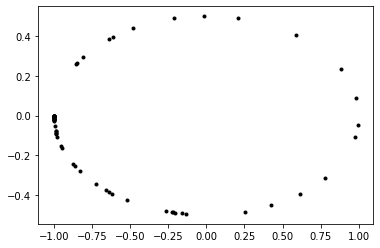

In [5]:
#Create a 3D datasets
m = 60
X = np.zeros((m,3))
np.random.seed(42)
angles = (np.random.rand(m)**3+0.5)*2*np.pi # uneven distribution
X[:, 0], X[:,1] = np.cos(angles), np.sin(angles)*0.5 #oval

plt.plot(X[:,0], X[:,1],'k.')

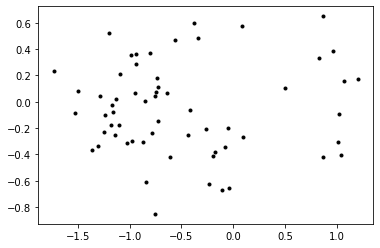

In [6]:
X += 0.28 * np.random.randn(m,3) #add more noise with dimentions as 60*3
plt.plot(X[:,0], X[:,1],'k.')

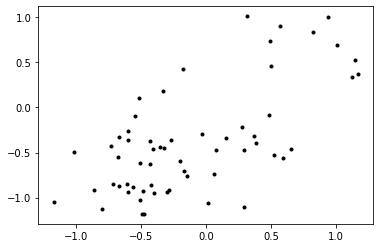

In [7]:
X = Rotation.from_rotvec([np.pi/29, -np.pi/20, np.pi/4]).apply(X) #Rotate a little
X += [0.2, 0, 0.2] #shift a bit
plt.plot(X[:,0], X[:,1],'k.')

In [8]:
from sklearn.decomposition import PCA

In [9]:
# plot the 3D dataset, with the projection plane
pca =PCA(n_components=2)
X2D = pca.fit_transform(X)
X3D_inv = pca.inverse_transform(X2D)
X_centered = X-X.mean(axis=0)

U, s, Vt = np.linalg.svd(X_centered)
axes =[-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1,x2 = np.meshgrid(np.linspace(axes[0], axes[1],10),
                   np.linspace(axes[2], axes[3], 10))
w1,w2 = np.linalg.solve(Vt[:2,:2], Vt[:2,2]) #projection plane coefs
z = w1 *(x1-pca.mean_[0]) +w2*(x2-pca.mean_[1]) -pca.mean_[2]
X3D_above = X[X[:,2] >= X3D_inv[:,2]]
X3D_below = X[X[:,2] < X3D_inv[:,2]]

Saving dataset_3d_plot...


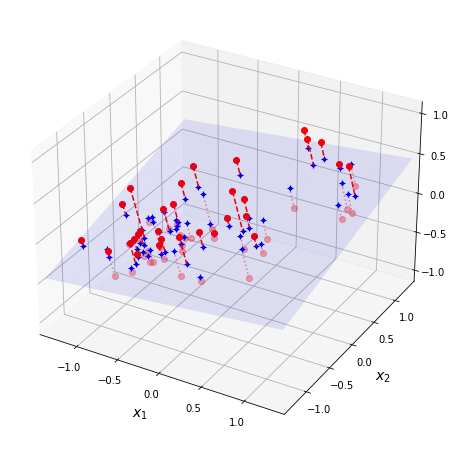

In [10]:
fig= plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
# plot samples and projection lines below plane first
ax.plot(X3D_below[:,0], X3D_below[:,1], X3D_below[:,2],'ro',alpha=0.3)

for i in range(m):
    if X[i,2] < X3D_inv[i,2]:
        ax.plot([X[i,0], X3D_inv[i,0]],
                 [X[i,1], X3D_inv[i,1]],
                 [X[i,2], X3D_inv[i,2]],
                 ':', color='#F88')
        
ax.plot_surface(x1,x2,z, alpha=0.1, color='b')
ax.plot(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2], 'b+') #plot inversed samples
ax.plot(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2], 'b.')

# now plot samples and projection lines above
for i in range(m):
    if X[i,2] >= X3D_inv[i,2]:
               ax.plot([X[i,0], X3D_inv[i,0]],
                 [X[i,1], X3D_inv[i,1]],
                 [X[i,2], X3D_inv[i,2]],
                 'r--') 
            
ax.plot(X3D_above[:,0], X3D_above[:,1], X3D_above[:,2], 'ro')

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])
    
set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])


save_fig("dataset_3d_plot", tight_layout=False)
plt.show()

Saving dataset_2d_plot...


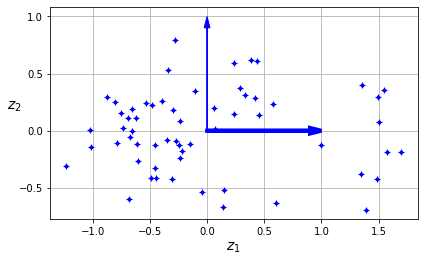

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:,0], X2D[:,1],'b+')
ax.plot(X2D[:,0], X2D[:,1],'b.')
ax.arrow(0,0,1,0, head_width=0.05, length_includes_head=True,
        head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0,0,0,1, head_width=0.05, length_includes_head=True,
        head_length=0.1, fc='b', ec='b', linewidth=1)

ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)
save_fig("dataset_2d_plot")

In [12]:
from sklearn.datasets import make_swiss_roll
from matplotlib.colors import ListedColormap

Saving swiss_roll_plot...


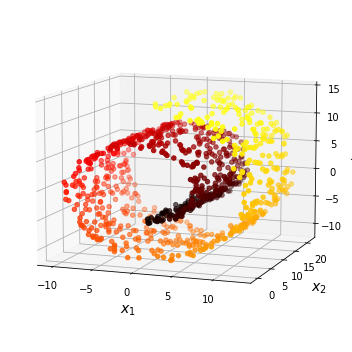

In [13]:
X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
darker_hot = ListedColormap(plt.cm.hot(np.linspace(0,0.8,256)))

fig =plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
axes = [-11.5, 14, -2, 23, -12, 15]

ax.scatter(X_swiss[:,0], X_swiss[:,1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
set_xyz_axes(ax, axes)

save_fig('swiss_roll_plot')
plt.show()

Saving squished_swiss_roll_plot...


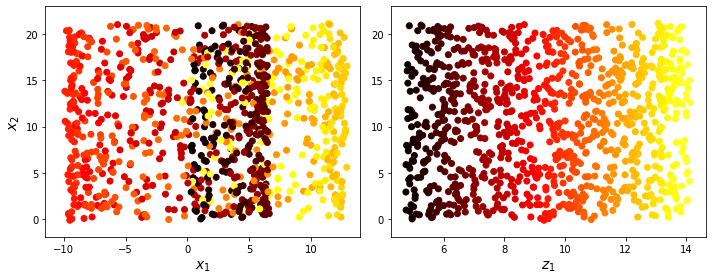

In [14]:
# squash the swiss roll
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.scatter(X_swiss[:,0], X_swiss[:,1],c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# unroll the swiss roll
plt.subplot(122)
plt.scatter(t, X_swiss[:,1], c=t, cmap= darker_hot)
plt.axis([min(t)-0.5,max(t)+0.5,axes[2], axes[3]])
plt.xlabel("$z_1$")

save_fig("squished_swiss_roll_plot")
plt.show()

Saving manifold_decision_boundary_plt...


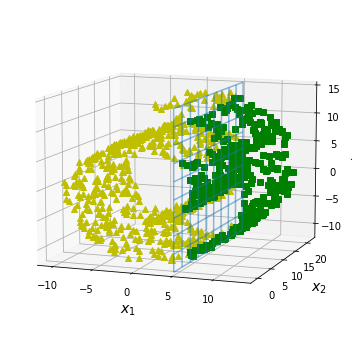

In [15]:
# draw dicision boundary

axes = [-11.5, 14, -2, 23, -12, 15]
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

positive_class = X_swiss[:,0]>5
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6,5))
ax = plt.subplot(111, projection='3d')
ax.view_init(10,-70)
ax.plot(X_neg[:,0], X_neg[:,1], X_neg[:,2], 'y^')
ax.plot_wireframe(5, x2, x3,alpha=0.5)
ax.plot(X_pos[:,0], X_pos[:,1], X_pos[:,2], 'gs')
set_xyz_axes(ax, axes)
save_fig("manifold_decision_boundary_plt")
plt.show()

Saving manifold_decision_boundary_2d_Projection...


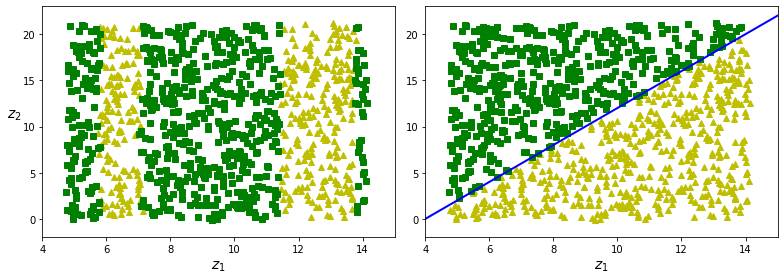

In [16]:
plt.figure(figsize=(11,4))
ax=plt.subplot(121)
ax.plot(t[positive_class], X_swiss[positive_class,1],'y^')
ax.plot(t[~positive_class], X_swiss[~positive_class,1],'gs')
ax.axis([4,15,axes[2],axes[3]])
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$', rotation=0, labelpad=8)
# save_fig("manifold_decision_boundary_2dprojection")


positive_class = 2 *( t[:]-4) > X_swiss[:,1]
X_pos = X_X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

ax=plt.subplot(122)
ax.plot(t[positive_class], X_swiss[positive_class,1],'y^')
ax.plot(t[~positive_class], X_swiss[~positive_class,1],'gs')
ax.plot([4, 15], [0, 22], "b-", linewidth=2)
ax.axis([4,15,axes[2],axes[3]])
ax.set_xlabel('$z_1$')

save_fig("manifold_decision_boundary_2d_Projection")
plt.show()

Saving manifold_decision_boundary_3D_v2...


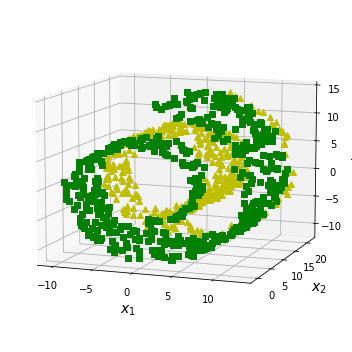

In [17]:
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1, projection='3d')
ax.view_init(10,-70)


ax.plot(X_neg[:,0], X_neg[:,1], X_neg[:,2], 'y^')
ax.plot(X_pos[:,0], X_pos[:,1], X_pos[:,2], 'gs')
set_xyz_axes(ax, axes)
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel("$x_1$", rotation=0)
ax.set_ylabel("$x_2$", rotation=0)
ax.set_zlabel("$x_3$", rotation=0)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
save_fig("manifold_decision_boundary_3D_v2")
plt.show()

Saving pca_best_projection_plot...


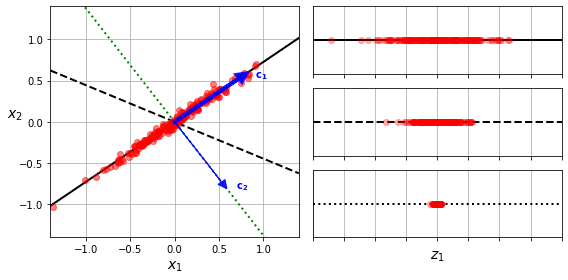

In [61]:
angle = np.pi/5
stretch =5
m=200

np.random.seed(42)
X_line = np.random.randn(m,2) /10
X_line =X_line @ np.array([[stretch, 0],[0,1]]) #stretch 
X_line = X_line @ np.array([[np.cos(angle), np.sin(angle)], [np.sin(angle), np.cos(angle)]])

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle- 2*np.pi/6), np.sin(angle- 2*np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])


X_proj1 = X_line @ u1.reshape(-1,1)
X_proj2 = X_line @ u2.reshape(-1,1)
X_proj3 = X_line @ u3.reshape(-1,1)

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2),(0,0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4* u1[1]/u1[0], 1.4 * u1[1]/ u1[0]], "k-", linewidth=2)
plt.plot([-1.4, 1.4], [-1.4* u2[1]/u2[0], 1.4 * u2[1]/ u2[0]], "k--", linewidth=2)
plt.plot([-1.4, 1.4], [-1.4* u3[1]/u3[0], 1.4 * u3[1]/ u3[0]], "g:", linewidth=2)
plt.plot(X_line[:,0],  X_line[:,1], 'ro', alpha=0.5)
plt.arrow(0,0, u1[0], u1[1], head_width=0.1, linewidth =4, alpha=0.9,
         length_includes_head = True, head_length=0.1, fc="b", ec ='b', zorder=10)

plt.arrow(0,0, u3[0], u3[1], head_width=0.1, linewidth=1, alpha=0.9,
         length_includes_head = True, head_length=0.1, fc='b', ec='b', zorder=10)
plt.text(u1[0]+0.1, u1[1] -0.05, r"$\mathbf{c_1}$", color="blue")
plt.text(u3[0]+0.1, u3[1], r"$\mathbf{c_2}$", color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.grid()

plt.subplot2grid((3,2),(0,1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=2)
plt.plot(X_proj1[:,0], np.zeros(m),'ro', alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()


plt.subplot2grid((3,2), (1,1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=2)
plt.plot(X_proj2[:,0], np.zeros(m), 'ro', alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3,2), (2,1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:,0], np.zeros(m), 'ro', alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()
plt.xlabel("$z_1$")

save_fig("pca_best_projection_plot")
plt.show()

In [45]:
X_proj1.shape

(200, 1)

In [9]:
X_centered = X - X.mean()
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:, 1]
c1,c2, Vt[0], Vt[1]

(array([0.64869608, 0.74387418, 0.16076255]),
 array([-0.53057196,  0.59348004, -0.60520645]),
 array([0.64869608, 0.74387418, 0.16076255]),
 array([-0.53057196,  0.59348004, -0.60520645]))

Note: in principle, the SVD factorization algorithm returns three matrices, **U**, **Σ** and **V**, such that  **X** = **UΣV**<sup>⊺</sup>, where **U** is an _m_ x _m_ matrix, **Σ** is an _m_ x _n_ matrix and **V** is an _n_ x _n_ matrix. But the `svd()` function returns **U**, **s** and **V**<sup>T</sup> instead. **s** is the vector containing all the values on the main diagonal of the top _n_ rows of **Σ**. since **Σ** is full of zeros elsewhere, we can reconstruct it from  **s**

In [10]:
m,n = X.shape
Σ =np.zeros_like(X_centered)

In [11]:
Σ[:n,:n] = np.diag(s)
assert np.allclose(X_centered,  U@Σ@Vt) #@ is matrix multiplication(dot)

In [12]:
U.shape, Vt.shape, Σ.shape

((60, 60), (3, 3), (60, 3))

### Projecting Down to d Dimensions
* projecting to 2 dimension

In [13]:
W2 = Vt[:2].T
X2D = X_centered @ W2
np.all( X2D== X_centered.dot(W2))

True

### Using Scikit-Learn

In [14]:
# pca in scikit-learn already cover the centered data work
pca = PCA(n_components=2)
X2D_p=pca.fit_transform(X)
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

### Explained variance Ratio

In [15]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

In [16]:
1-pca.explained_variance_ratio_.sum()

0.09028309326742046

### Choosing the Right Number of Dimensions

In [23]:
# using mnist_784 dataset as an example to compare 
from sklearn.datasets import fetch_openml


In [4]:
mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [19]:
pca = PCA()
pca.fit_transform(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [20]:
d=np.argmax(cumsum>=0.95)+1 #154
d

154

In [21]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [22]:
pca.n_components_

154

In [23]:
pca.explained_variance_ratio_.sum()

0.9501960192613031

Saving explained_variance_plot...


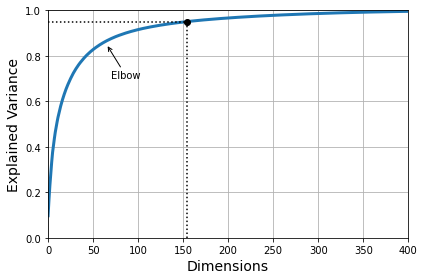

In [24]:
plt.figure(figsize=(6,4))
plt.plot(cumsum,linewidth=3)
plt.axis([0,400,0,1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d,d],[0,0.95],'k:')
plt.plot([0,d],[0.95,0.95],'k:')
plt.plot(d,0.95, 'ko')
plt.annotate('Elbow', xy=(65, 0.85), xytext=(70, 0.7),
            arrowprops = dict(arrowstyle="->"))
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

In [24]:
# Using randomizedSearchCV or GridSerachCV to find the optimal n_components
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

In [26]:
clf = make_pipeline(PCA(random_state =42),
                    RandomForestClassifier(random_state =42))
param_distrib={'pca__n_components': np.arange(10,80),
           'randomforestclassifier__n_estimators': np.arange(50,500)}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [27]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}

In [28]:
clf= make_pipeline(PCA(random_state=42),
                   SGDClassifier())
#                   SGDClassifier(random_state=42)) #best_params:79
param_grid= {'pca__n_components': np.arange(10,80)}
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

In [29]:
grid_search.best_params_

{'pca__n_components': 60}

### PCA fo Compression

In [30]:
pca = PCA(n_components=0.95)
X_reduced =pca.fit_transform(X_train)

In [31]:
X_recovered = pca.inverse_transform(X_reduced)

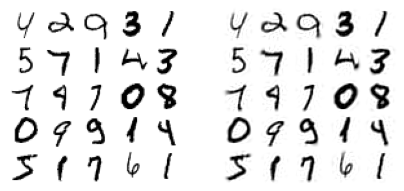

In [32]:
# plot the original one and reconstruct one with sampled images(sampled once every 2100 images)
plt.figure(figsize=(7,4))
for idx, X in enumerate([X_train[::2100], X_recovered[::2100]]):
    plt.subplot(1,2, idx+1)
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row*5+col].reshape(28,28), cmap='binary',
                      vmin=0, vmax=255, extent=(row, row+1, col, col+1))
            plt.axis([0,5,0,5])
            plt.axis('off')
        
        

### Randomized PCA -- need to set svd_solver
    

In [33]:
rnd_pca = PCA(n_components=154, svd_solver='randomized', random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)
X_reduced.shape

(60000, 154)

### Incremental PCA

In [34]:
from sklearn.decomposition import IncrementalPCA

In [35]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

#### Using Numpy's memmap class - a memory-map to an array stored in a binary file on disk
Creating the `memmap` instance, copy the MNIST training set into in it and then call `flush()` which ensures that any data still in cache is saved to disk. This would typically be done by a first program: 

Note: In Python, **x[:] = y[:]** is used to copy all elements of the list y into the list x, whereas **x = y** simply assigns y to x, meaning both x and y refer to the same list object in memory.

Therefore, if you modify x after assigning x=y, y will also be modified since they refer to the same object. In contrast, if you modify x after using x[:] = y[:], y will remain unchanged since they are separate list objects.

**x[:] = y** is similar to x[:] = y[:] in that it copies the elements of list y into list x. The difference is that x[:] = y only copies the elements of y into the existing slice of x starting from the beginning of x. If x is longer than y, any elements of x beyond the length of y will remain in place.

In [36]:
filename = 'my_minist.mmap'
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape= X_train.shape)
X_mmap[:] = X_train
X_mmap.flush()

In [37]:
X_mmap.shape

(60000, 784)

Next, another program would load the data and use it for training:

In [38]:
X_mmap = np.memmap(filename, dtype='float32', mode='readonly').reshape(-1,784)
batch_size = X_mmap.shape[0]//n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

In [39]:
X_mmap.shape

(60000, 784)

## Kernel PCA

In [40]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA

In [41]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
rbf_pca = KernelPCA(kernel='rbf', n_components=2, gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

### Swiss roll reduced to  2D using kPCA with various kernels:

Saving kernel_pca_plot...


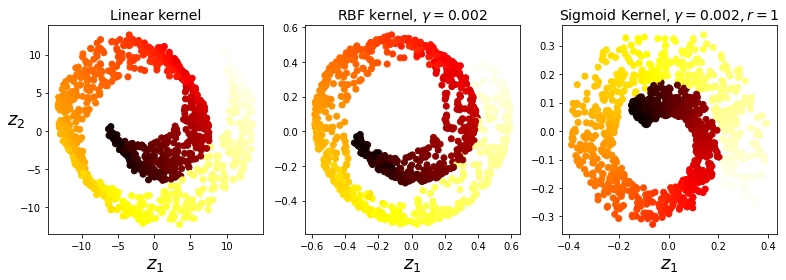

In [42]:
lin_pca = KernelPCA(kernel='linear', n_components=2, fit_inverse_transform=True)
rbf_pca = KernelPCA(kernel='rbf', n_components=2, fit_inverse_transform=True, gamma=0.002)
sig_pca = KernelPCA(n_components=2,kernel='sigmoid', fit_inverse_transform=True, gamma=0.002,coef0=1)

y=t>6.9

plt.figure(figsize=(11,4))
for subplot, pca, title in ((131, lin_pca,rf'Linear kernel'),
                            (132, rbf_pca, rf'RBF kernel, $\gamma={rbf_pca.gamma}$'),
                            (133, sig_pca,rf'Sigmoid Kernel, $\gamma={sig_pca.gamma}, r={sig_pca.coef0}$')):
    pca.random_state=42
    X_reduced=pca.fit_transform(X)
    if subplot==(132):
        X_rbf_reduced = X_reduced
        
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$",fontsize=18)
    if subplot==(131):
        plt.ylabel("$z_2$", rotation=0,fontsize=18)
        

save_fig("kernel_pca_plot")
plt.show()        

Saving preimage_plot...


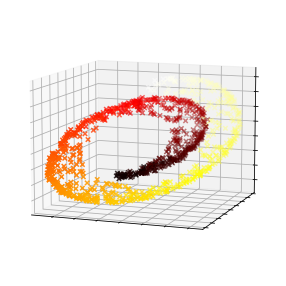

In [43]:
# Kernel PCA and the reconstruction pre-image error
X_inverse = rbf_pca.inverse_transform(X_rbf_reduced)

plt.figure(figsize=(6,5))
ax=plt.subplot(111, projection='3d')
ax.view_init(10,-70)
ax.scatter(X_inverse[:,0], X_inverse[:,1], X_inverse[:,2], c=t,
           cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

save_fig("preimage_plot", tight_layout=False)
plt.show()

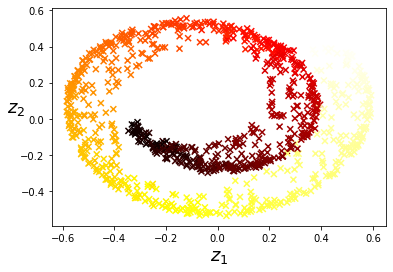

In [44]:
X_reduced = rbf_pca.fit_transform(X)


plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap =plt.cm.hot, marker='x')
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.show()

### Selecting a Kernel and Tuning Hyperparameters

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
clf = make_pipeline(
    KernelPCA(n_components=2),
    LogisticRegression(solver='lbfgs')
)
param_grid ={'kernelpca__gamma': np.linspace(0.03, 0.05,10),
            'kernelpca__kernel': ['rbf','sigmoid']}

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kernelpca', KernelPCA(n_components=2)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'kernelpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                         'kernelpca__kernel': ['rbf', 'sigmoid']})

In [47]:
print(grid_search.best_params_)

{'kernelpca__gamma': 0.043333333333333335, 'kernelpca__kernel': 'rbf'}


In [48]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433,
                   fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage= rbf_pca.inverse_transform(X_reduced)

In [49]:
from sklearn.metrics import mean_squared_error


In [114]:
mean_squared_error(X, X_preimage)

32.786308795766125

## LLE(Locally Linear Embedding)
LLE is a powerful `nonlinear dimensionality reduction`(NLDR) technique. it is particularly good at unrolling twisted manifold, especially when there is not too much noise

In [50]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

In [51]:
X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

Saving lle_unrolling_plot...


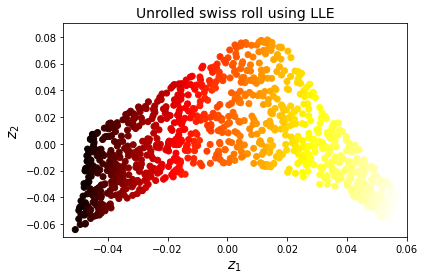

In [55]:
plt.scatter(X_unrolled[:, 0],  X_unrolled[:,1], c=t, cmap= plt.cm.hot)
plt.xlabel(("$z_1$"))
plt.ylabel(("$z_2$"))
plt.axis([-0.055, 0.060, -0.07, 0.09])
plt.title("Unrolled swiss roll using LLE")

save_fig("lle_unrolling_plot")
plt.show()

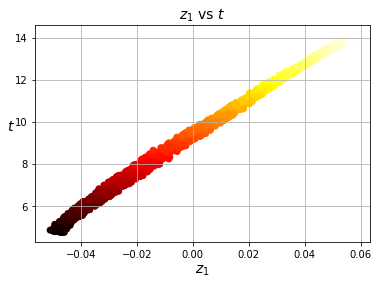

In [57]:
# show how well correlated z1 is to t: LLE worked fine
plt.title("$z_1$ vs $t$")
plt.scatter(X_unrolled[:,0],t, c=t, cmap= plt.cm.hot)
plt.xlabel("$z_1$")
plt.ylabel("$t$", rotation=0)
plt.grid(True)
plt.show()

### Other Dimensionality reduction techniques

In [25]:
from sklearn.manifold import MDS, Isomap, TSNE

In [59]:
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X_swiss)

In [61]:
isomap= Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_swiss)

In [63]:
tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate='auto')
X_reduced_tsne = tsne.fit_transform(X_swiss)

Saving other_dim_reduction_plot...


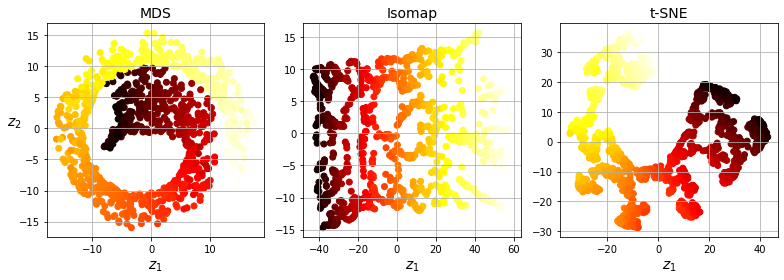

In [68]:
titles = ["MDS", "Isomap", "t-SNE"]
X_reduced_set = [X_reduced_mds, X_reduced_isomap , X_reduced_tsne]
_, axes = plt.subplots(ncols=3, figsize=(11,4))
for idx, (X_reduced, title) in enumerate(zip(X_reduced_set, titles)):
    plt.sca(axes[idx])
    plt.title(title)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap= plt.cm.hot)
    plt.xlabel("$z_1$")
    if idx==0:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

save_fig("other_dim_reduction_plot")
plt.show()

## Using MNIST dataset to A/B test the PCA performance 

In [26]:
X_train,X_test = mnist.data[:60_000], mnist.data[60_000:]
y_train,y_test = mnist.target[:60_000], mnist.target[60_000:]

In [27]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [71]:
rnd_clf = RandomForestClassifier(n_estimators=200, random_state=42)
%time rnd_clf.fit(X_train, y_train)

CPU times: total: 52 s
Wall time: 52.7 s


RandomForestClassifier(n_estimators=200, random_state=42)

In [72]:
rnd_clf.score(X_test, y_test)

0.9707

In [6]:
from sklearn.metrics import accuracy_score

In [74]:
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9707

In [75]:
pca = PCA(n_components=0.95, random_state=42)
X_reduced = pca.fit_transform(X_train)
rnd_clf_with_pca = RandomForestClassifier(n_estimators=200, random_state=42)
%time rnd_clf_with_pca.fit(X_reduced, y_train)

CPU times: total: 2min 7s
Wall time: 2min 10s


RandomForestClassifier(n_estimators=200, random_state=42)

In [79]:
X_test_reduced.shape

(10000, 154)

In [80]:
X_test_reduced = pca.transform(X_test)
rnd_clf_with_pca.score(X_test_reduced,y_test )

0.9515

It is common for performance to drop slightly when reducing dimensionality, because we do lose some potentially useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance

In [81]:
# Try again with the SGDClassifier again to check how much does PCA help
sgd_clf =SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train, y_train)

CPU times: total: 1min 47s
Wall time: 1min 49s


SGDClassifier(random_state=42)

In [83]:
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.874

In [85]:
sgd_clf.score(X_test, y_test)

0.874

In [89]:
sgd_clf_with_pca =SGDClassifier(random_state=42)
%time sgd_clf_with_pca.fit(X_reduced, y_train)

CPU times: total: 20.3 s
Wall time: 21.1 s


SGDClassifier(random_state=42)

In [90]:
sgd_clf_with_pca.score(X_test_reduced, y_test)

0.8959

For SCM, PCA not only gave us a 5x speed boost, it also improved performance slightly.
So whether PCA can provide a speedup or performance boost depends on the dataset and model.

## Explore t-SNE and Other dimensionality techniques in MNIST
t-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It's mostly used for  visualization, in particular to visualize cluster of instances in high-dimensional space

In [28]:
# Use t-SNE to reduce the first 5,000 images of MNIST to 2 dimentsions and plot the result
X_sample, y_sample = X_train[:5000], y_train[:5000]
tsne = TSNE(n_components=2, random_state=42, 
           learning_rate='auto', init='random')
%time X_reduced = tsne.fit_transform(X_sample)

CPU times: total: 1min 39s
Wall time: 15 s


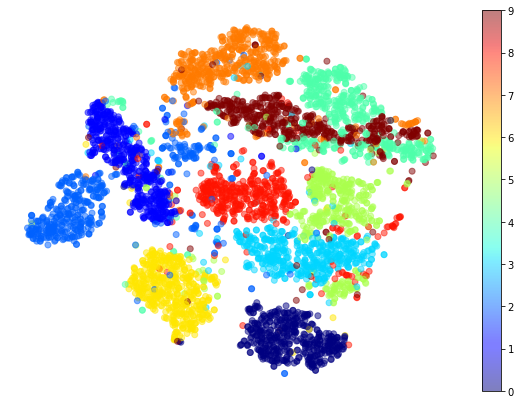

In [29]:
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:,0], X_reduced[:,1],
           c=y_sample.astype(np.int8),cmap='jet', alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

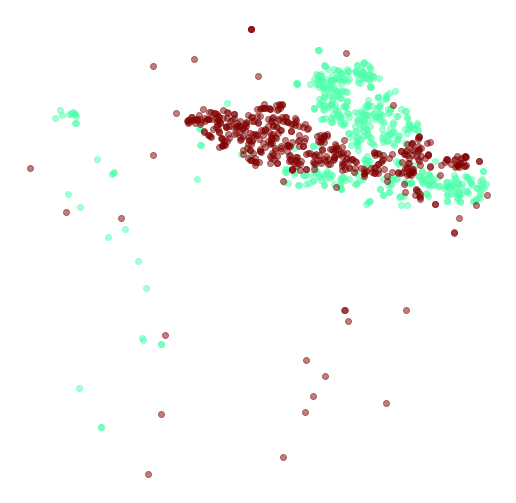

In [30]:
# since there some overlap, like 4s and 9s (in the top-right corner),let's focus on 4 and 9
plt.figure(figsize=(9,9))
cmap=plt.cm.jet
for digit in ('4', '9'):
    plt.scatter(X_reduced[:,0][(y_sample==digit)], X_reduced[:,1][(y_sample==digit)],
           c= [cmap(float(digit)/9)],
              alpha=0.5)
    
plt.axis('off')
plt.show()

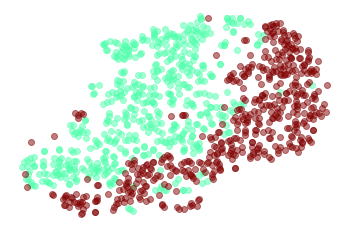

In [31]:
# Let's see if we can produce a nicer image by running t-SNE on just these 2 digits:
idx =(y_sample=='4')|(y_sample=='9')
X_subset = X_sample[idx]
y_subset = y_sample[idx]
tsne = TSNE(n_components=2, learning_rate='auto', init='random',random_state=42)
X_subset_reduced = tsne.fit_transform(X_subset)

for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset == digit,0] , X_subset_reduced[y_subset == digit,1],
                c= [cmap(float(digit)/9)], alpha=0.5)
    
plt.axis('off')
plt.show()

In [ ]:
# try to replace each dot in the scatterplot with the corresponding instance's class(a digit from 0 to 9), 
# or plot scaled-down version of the digit images, with a minimum distance  guaranteed between these digits 

In [32]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [33]:
def plot_digits(X,y, images=None, min_distances=0.04, figsize=(13,10)):
    #Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    
    neighbors= np.array([[10,10]])
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
#     plot the points
    for digit in digits:
        plt.scatter(X_normalized[y==digit,0], X_normalized[y==digit,1],
                   c= [cmap(float(digit)/9)], alpha=0.5)
    plt.axis("off")
    
    ax=plt.gca()
    # plot each instance's class or scaled-down version of the digit images
    for idx, image_coord in enumerate(X_normalized):
        closest_dist = np.linalg.norm(neighbors - image_coord,axis=1).min()
        if closest_dist>min_distances:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0],image_coord[1], str(int(y[idx])),
                        color = cmap(float(y[idx])/9),
                        fontdict={'weight':'bold', "size":16})
            else:
                image = images[idx].reshape(28,28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap='binary'),#
                                         image_coord)
                ax.add_artist(imagebox)
     

     

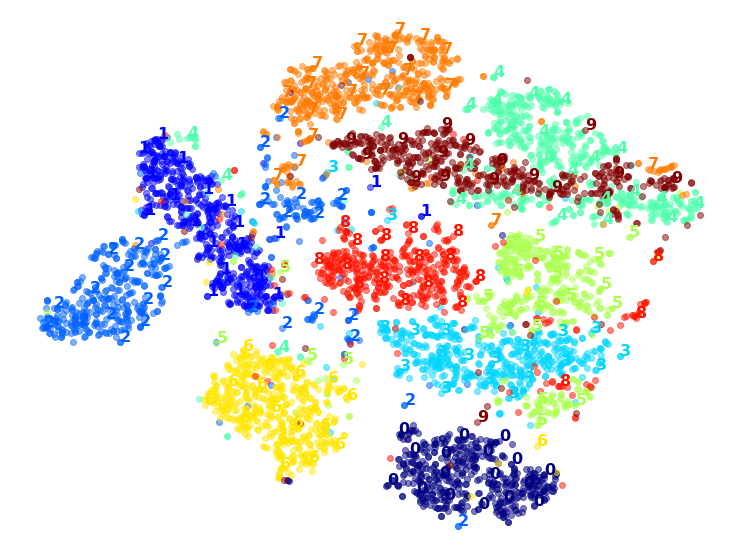

In [34]:
plot_digits(X_reduced, y_sample)

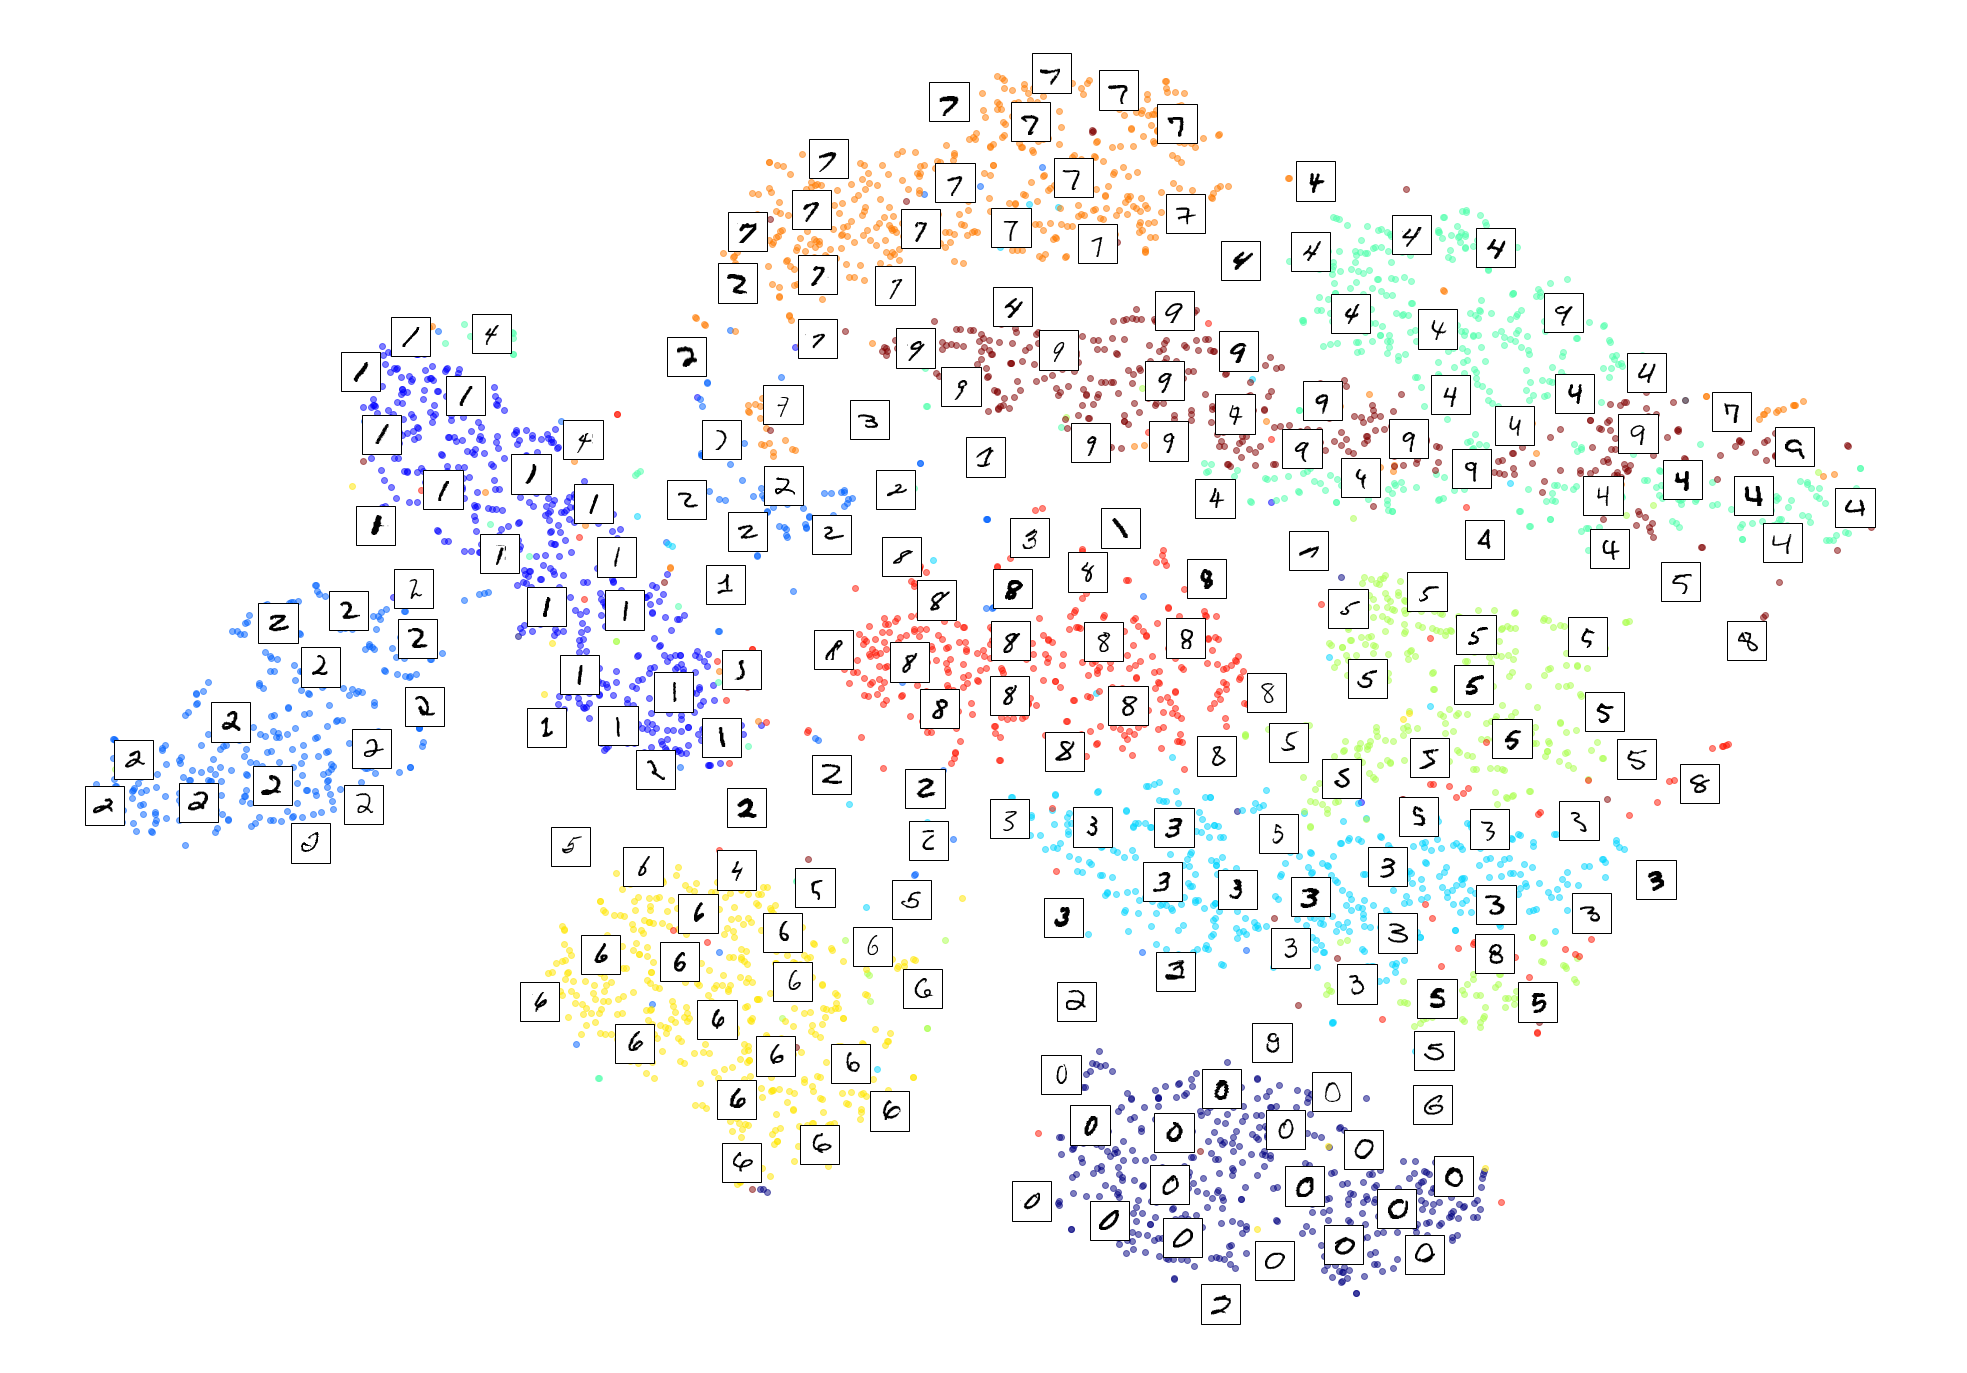

In [35]:
plot_digits(X_reduced, y_sample, images=X_sample, figsize=(35,25))

CPU times: total: 3.16 s
Wall time: 4.05 s


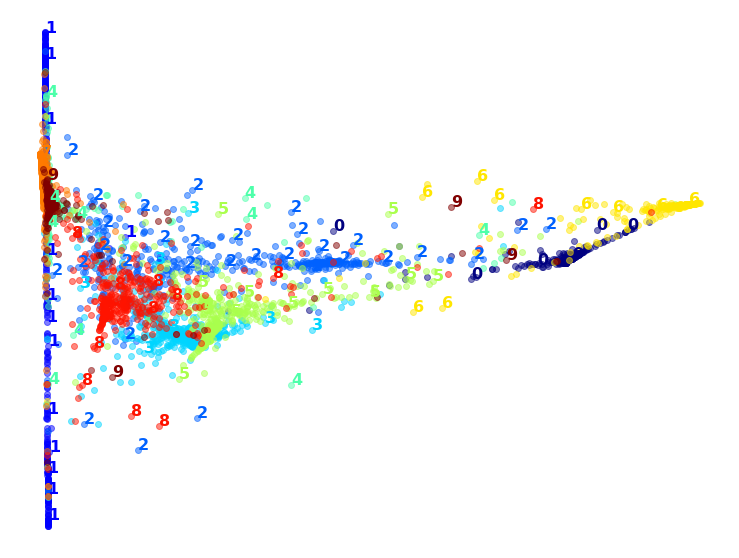

In [36]:
from sklearn.manifold import LocallyLinearEmbedding
# Let's try LLE
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
%time X_lle_reduced = lle.fit_transform(X_sample)
plot_digits(X_lle_reduced, y_sample)

In [37]:
# Since the result does not look good. Try to apply PCA first, perseving 95% of the variance

CPU times: total: 1.78 s
Wall time: 4.1 s


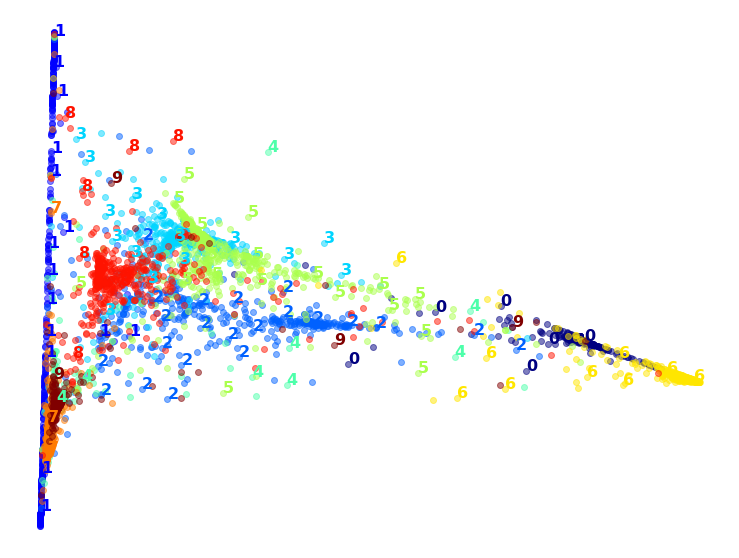

In [40]:
pca_lle = make_pipeline(PCA(n_components =0.95, random_state=42, ),
                       LocallyLinearEmbedding(n_components=2, random_state=42)) 
%time X_pca_lle_reduced =pca_lle.fit_transform(X_sample)
plot_digits(X_pca_lle_reduced, y_sample)
plt.show()

CPU times: total: 12min 10s
Wall time: 10min 9s


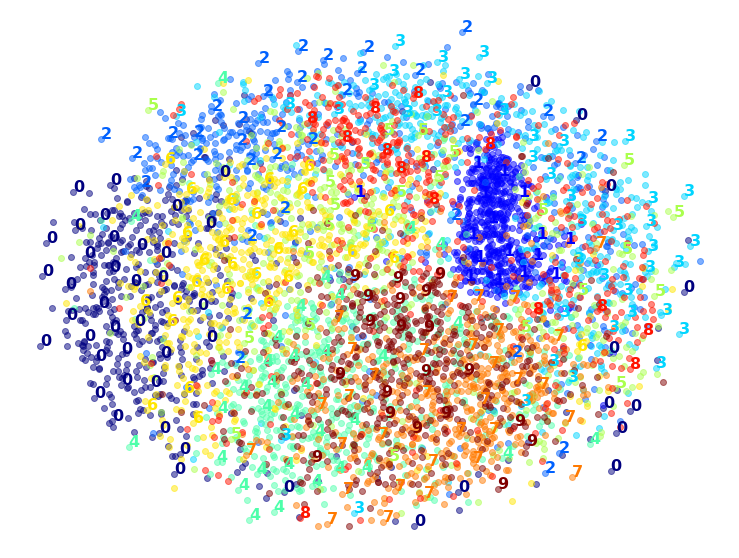

In [41]:
# Let's try MDS:
%time X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X_sample)
plot_digits(X_mds_reduced, y_sample)
plt.show()

MDS's result does not look great. All clusters overlap too much and use a lot of time, we will try PCA first and then MDS to see whether there is some improvement 

CPU times: total: 12min 10s
Wall time: 10min 15s


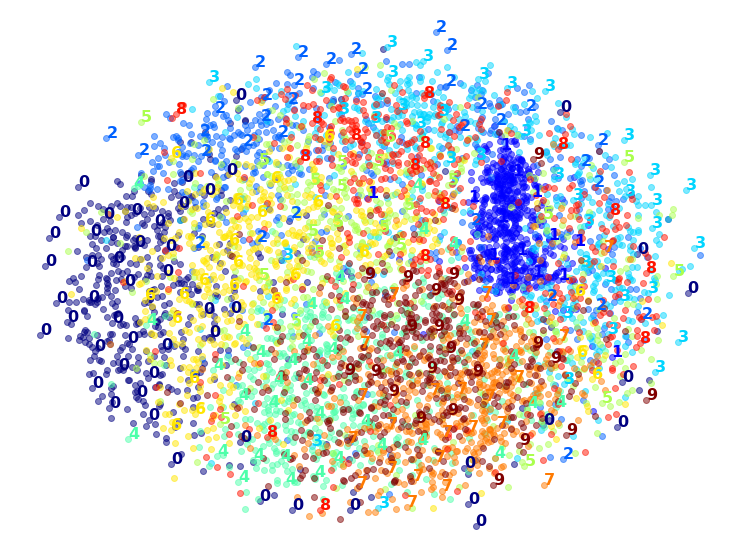

In [43]:
pca_mds = make_pipeline(PCA(n_components=0.95, random_state=42),
                       MDS(n_components=2, random_state=42))

%time X_pca_mds_reduced =pca_mds.fit_transform(X_sample)
plot_digits(X_pca_mds_reduced, y_sample)
plt.show()

Same result, and not faster, PCA did not help in this case

In [48]:
#Finally, we try LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda= LinearDiscriminantAnalysis(n_components=2)
%time X_lda_reduced = lda.fit_transform(X_sample, y_sample)

CPU times: total: 609 ms
Wall time: 847 ms


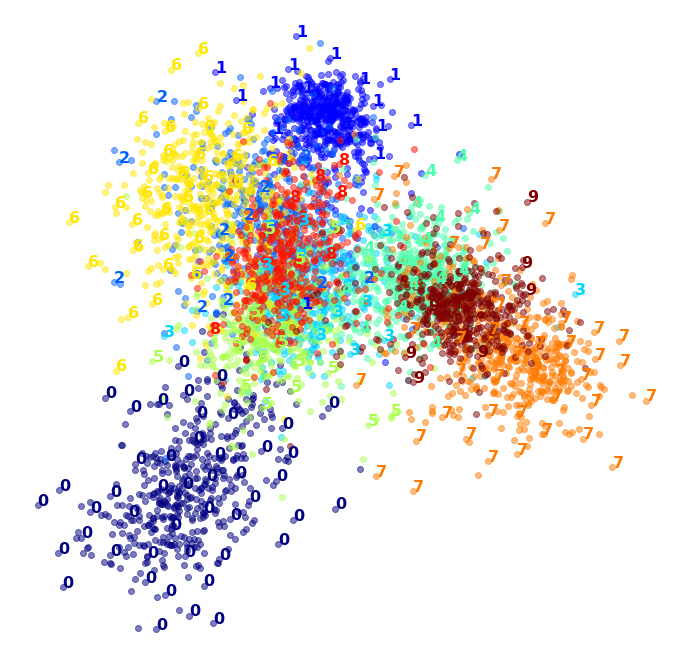

In [49]:
plot_digits(X_lda_reduced, y_sample, figsize=(12,12))
plt.show()

LDA is very fast but the effect is not as good as tSNE one. In sum, t-SNE is the best for MNIST dataset